In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# pySuperfish Basic Example

In [2]:
import sys, os
sys.path.append('C:\\Users\\Chris\\GitHub\\pySuperfish')

In [3]:
from superfish import Superfish

In [4]:
AMFILE = 'data\\swifel_5.0_4.5_36.0_30.0_5.0_2.0_2.0.am'
os.path.exists(AMFILE)


True

In [5]:
SF = Superfish(AMFILE, verbose=True)

In [6]:
SF.configure()

Configured to run in: C:\Users\Chris\AppData\Local\Temp\tmpiht7ucm0


In [7]:
# Run, should take about a minute
SF.run()

Running C:\LANL\AUTOFISH.EXE SWIFEL_5.0_4.5_36.0_30.0_5.0_2.0_2.0.AM in C:\Users\Chris\AppData\Local\Temp\tmpiht7ucm0
Done in     105.29 seconds
Parsed output: C:\Users\Chris\AppData\Local\Temp\tmpiht7ucm0\SWIFEL_5.0_4.5_36.0_30.0_5.0_2.0_2.0.SFO


In [8]:
# This is automatically done above
SF.load_output()

Parsed output: C:\Users\Chris\AppData\Local\Temp\tmpiht7ucm0\SWIFEL_5.0_4.5_36.0_30.0_5.0_2.0_2.0.SFO


# SFO Output

In [9]:
SF.output.keys()

dict_keys(['sfo'])

In [10]:
SF.output['sfo'].keys()

dict_keys(['wall_segments', 'other', 'summary'])

In [11]:
SF.output['sfo']['summary']

{'type': 'summary',
 'data': {'Enorm': 30.0,
  'Frequency': 189.25588,
  'Particle rest mass energy': 0.510999,
  'beta': 0.95,
  'kinetic_energy': 1.126,
  'Normalization factor for E0': 34612.436,
  'Transit-time factor': 0.996786,
  'Stored energy': 8.8913335,
  'Superconductor surface resistance': 23.9377,
  'Operating temperature': 4.2,
  'Power dissipation': 2820.6769,
  'Q': 3748370000.0,
  'Shunt impedance': 2911881.913,
  'Rs*Q': 89.727,
  'Z*T*T': 2893194.345,
  'r/Q': 177.526,
  'Wake loss parameter': 0.05278,
  'AvgH': 8744.34,
  'MaxH_z': 30.8887,
  'MaxH_r': 13.2594,
  'MaxH': 19848.9,
  'MaxE_z': 49.7943,
  'MaxE_r': 3.19932,
  'MaxE': 39.2425,
  'Ratio of peak fields Bmax/Emax': 0.6356,
  'Peak-to-average ratio Emax/E0': 6.5668},
 'units': {'Enorm': 'MV/m',
  'Frequency': 'MHz',
  'Particle rest mass energy': 'MeV',
  'beta': '',
  'kinetic_energy': 'MeV',
  'Normalization factor for E0': '',
  'Transit-time factor': '',
  'Stored energy': 'Joules',
  'Superconductor su

In [12]:
SF.output['sfo']['summary']['data']

{'Enorm': 30.0,
 'Frequency': 189.25588,
 'Particle rest mass energy': 0.510999,
 'beta': 0.95,
 'kinetic_energy': 1.126,
 'Normalization factor for E0': 34612.436,
 'Transit-time factor': 0.996786,
 'Stored energy': 8.8913335,
 'Superconductor surface resistance': 23.9377,
 'Operating temperature': 4.2,
 'Power dissipation': 2820.6769,
 'Q': 3748370000.0,
 'Shunt impedance': 2911881.913,
 'Rs*Q': 89.727,
 'Z*T*T': 2893194.345,
 'r/Q': 177.526,
 'Wake loss parameter': 0.05278,
 'AvgH': 8744.34,
 'MaxH_z': 30.8887,
 'MaxH_r': 13.2594,
 'MaxH': 19848.9,
 'MaxE_z': 49.7943,
 'MaxE_r': 3.19932,
 'MaxE': 39.2425,
 'Ratio of peak fields Bmax/Emax': 0.6356,
 'Peak-to-average ratio Emax/E0': 6.5668}

# Plot

In [13]:
# Nicer plotting
%config InlineBackend.figure_format = 'retina'

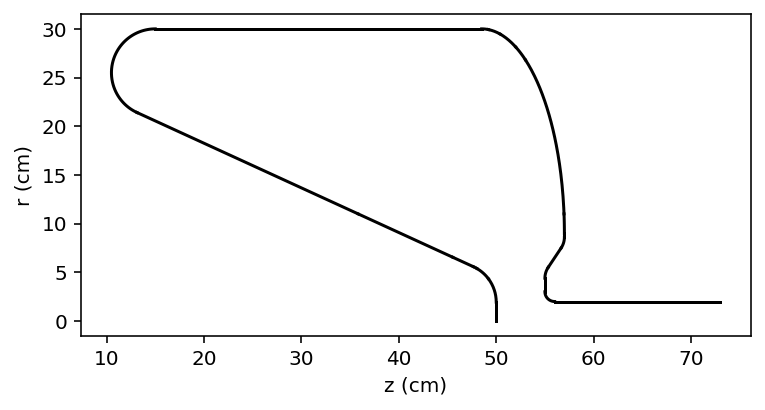

In [14]:
SF.plot_wall()

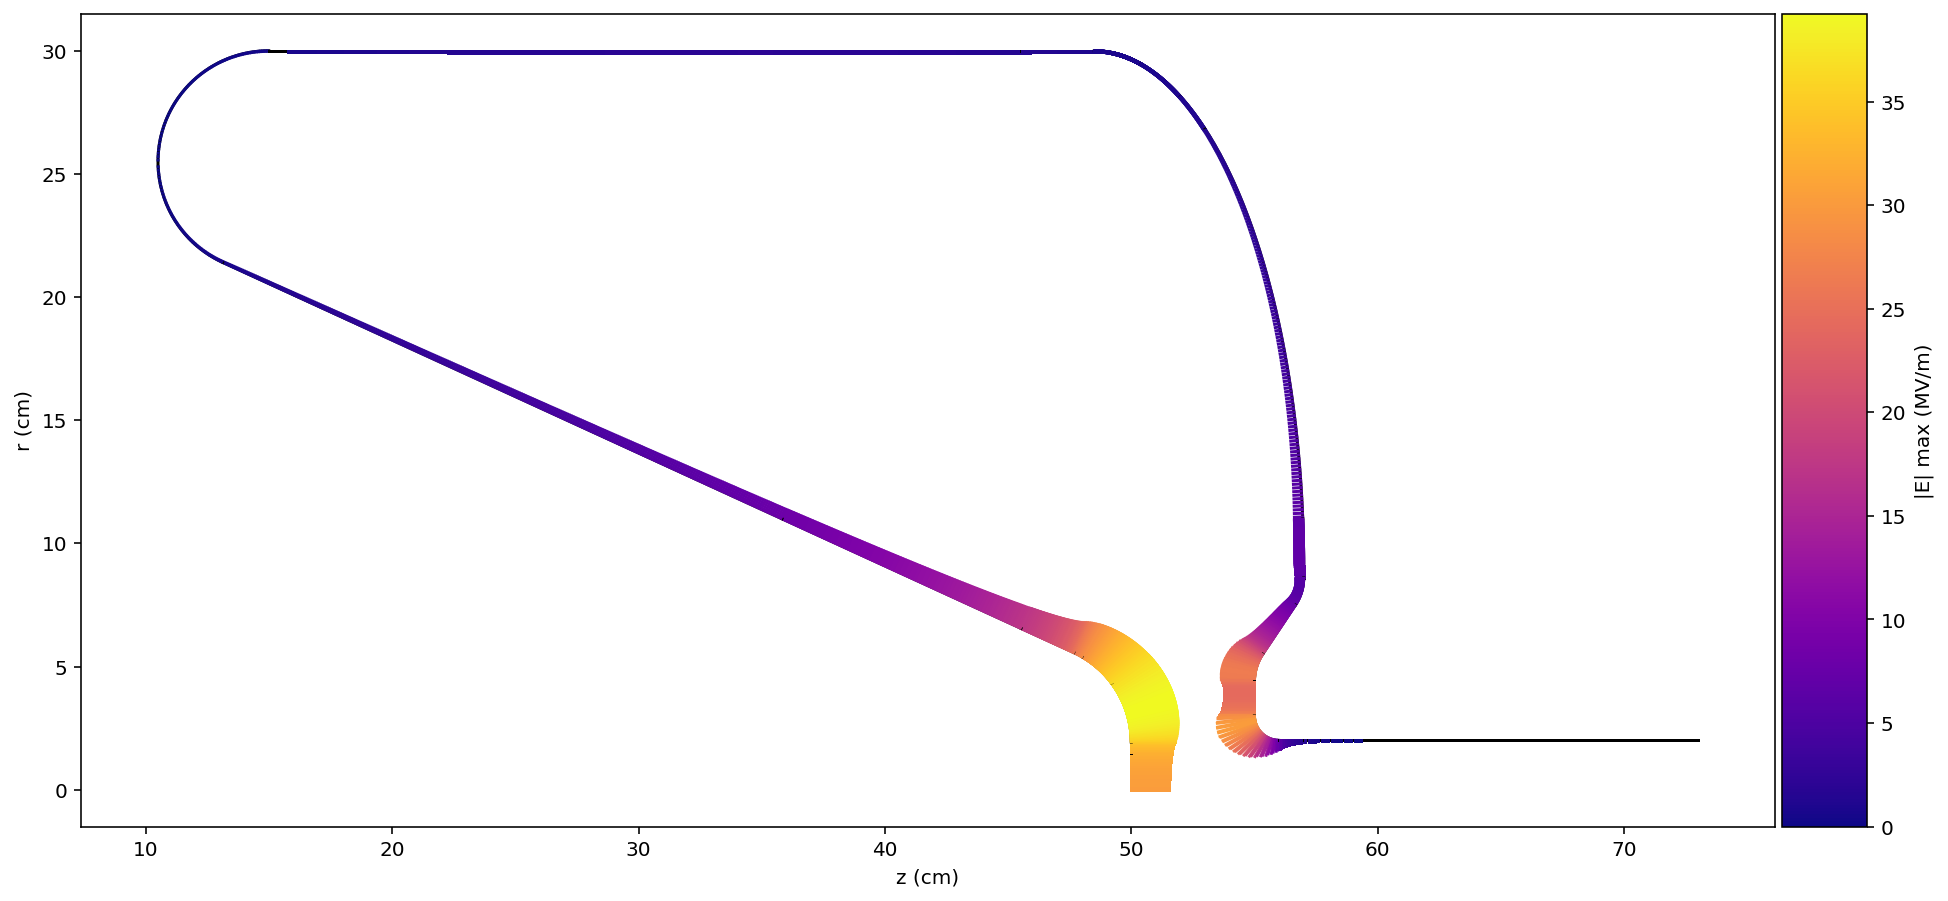

In [15]:
SF.plot_wall(perp_scale=2, figsize=(16,9))

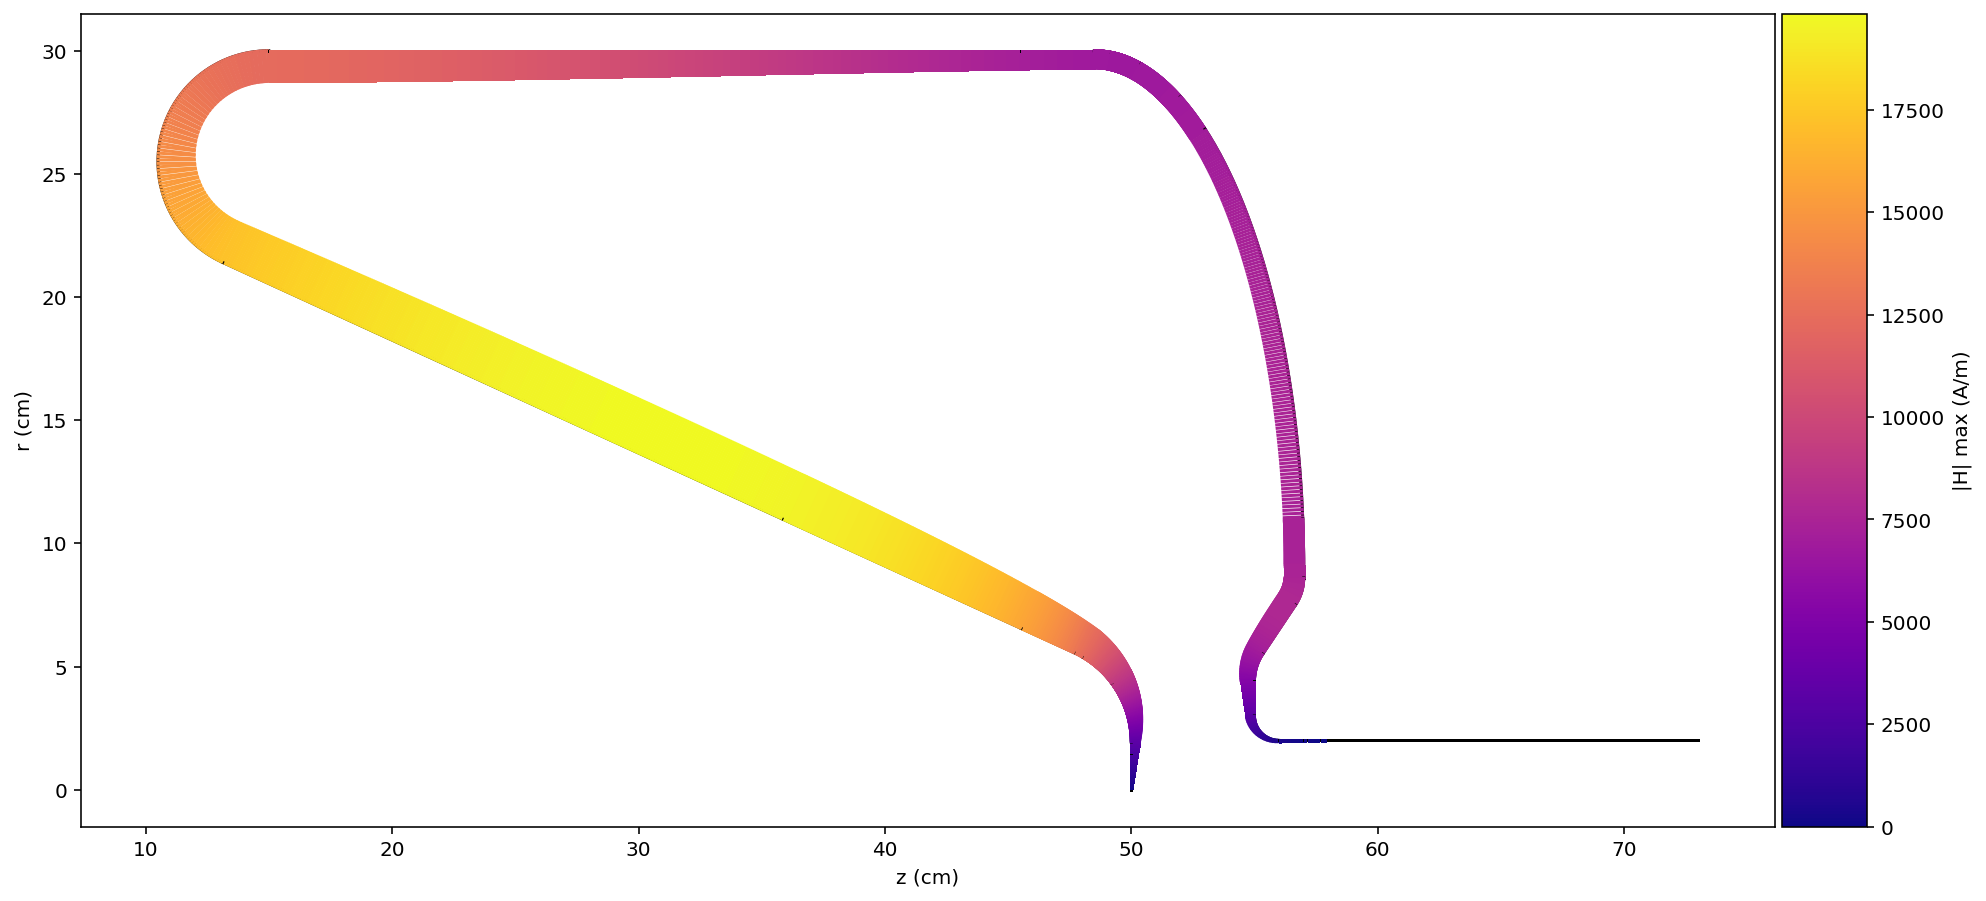

In [16]:
SF.plot_wall(perp_scale=2, field='H', figsize=(16,9))